## Data Science from Scratch

#### Meeting: Jun 27, 2019 @ Cinco Ranch Library, Classroom on 2nd Floor

Reading through and working exercises from the Second Edition of Joel Grus' classic book, Data Science from Scratch: First Priciples from Python

## Chapter 10 - Working with Data

### Exploring Your Data

In [1]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)

In [2]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

#uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

print(uniform[:10])

[68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]


<Figure size 432x288 with 0 Axes>

In [3]:
#normal w mean 0, standard deviation 57 
normal = [57 * inverse_normal_cdf(random.random()) for _ in range (10000)]

print(normal[:10])

[50.763559341430664, 18.96437644958496, 21.814985275268555, -78.38902473449707, 9.092702865600586, 33.36962699890137, -73.94894599914551, -59.80679512023926, -47.64876365661621, -39.27197456359863]


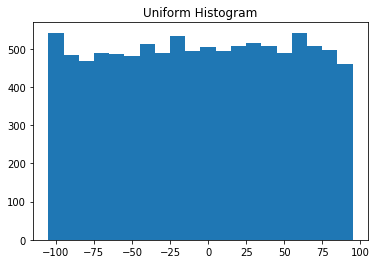

In [4]:
plot_histogram(uniform, 10, "Uniform Histogram")

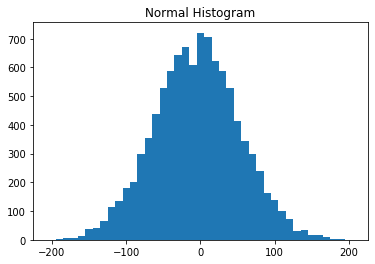

In [5]:
plot_histogram(normal, 10, "Normal Histogram")

### Two Dimensions

In [6]:
def random_normal() -> float:
    """Returns random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [7]:
xs = [random_normal() for _ in range(10000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

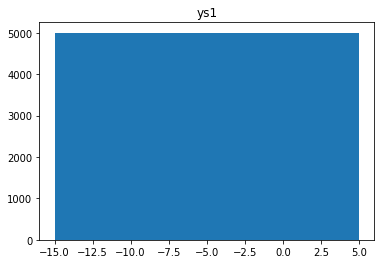

In [8]:
plot_histogram(ys1, 10, "ys1")

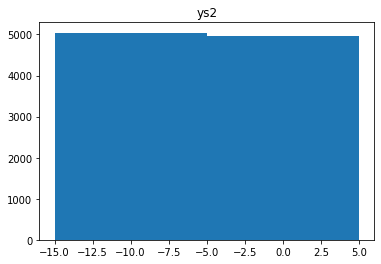

In [9]:
plot_histogram(ys2, 10, "ys2")

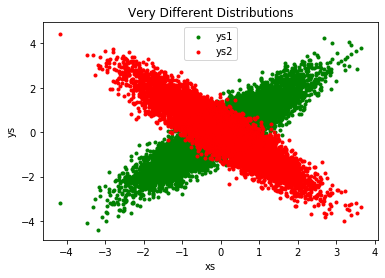

In [10]:
# scatter
plt.scatter(xs, ys1, marker=".", color='green', label='ys1')
plt.scatter(xs, ys2, marker=".", color='red', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Distributions")
plt.show()

0.8925806189227748
-0.8956130066187867


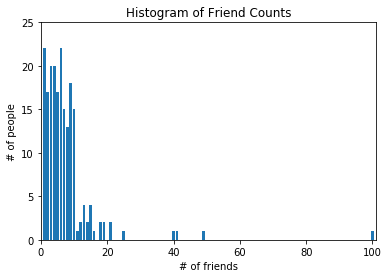

In [11]:
from scratch.statistics import correlation 

print(correlation(xs, ys1))
print(correlation(xs, ys2))

### Many Dimensions

In [12]:
from scratch.linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """Returns correlation matrix"""
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

In [13]:
    # pulled this out of working_with_data.py, ~line 67 
    # but made changes to shape result

    num_points = 100
    random.seed(0)

    def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
    
    data = [random_row()
            for _ in range(num_points)]
    
    # this matrix (i.e. list of lists) needs to be transposed to work with code in the book, 
    # as we can only easily slice by rows (first dimension). That's why everyone uses numpy :)

    corr_data = [[data[j][i] for j in range(num_points)] for i in range(len(data[0]))]
            
    print("rows", len(corr_data))
    print("cols", len(corr_data[0]))
    
    print(corr_data)


rows 4
cols 100
[[1.0127925872802734, -0.6466960906982422, 0.7850933074951172, 0.21056175231933594, -0.5773830413818359, -0.6729030609130859, 0.8787059783935547, 0.6123065948486328, -0.06987571716308594, 0.2816295623779297, -0.05766868591308594, 0.8597087860107422, 0.5819606781005859, 0.4348278045654297, 1.115121841430664, 1.1286258697509766, -0.7107639312744141, -0.1307964324951172, 0.019903182983398438, 0.12887001037597656, 0.8944797515869141, 0.26160240173339844, 0.24374961853027344, -0.5524158477783203, 0.28655052185058594, -1.3418292999267578, 1.4281940460205078, 1.4261150360107422, 0.5396556854248047, 1.034231185913086, 1.6425800323486328, 0.41314125061035156, 0.8180141448974609, -0.03397941589355469, -0.6965732574462891, -0.7706356048583984, 0.8998966217041016, 0.5177211761474609, 1.3408565521240234, -1.9317150115966797, 0.1915454864501953, 2.064542770385742, 1.7627811431884766, -0.8044147491455078, -1.9994068145751953, -0.6435871124267578, -0.38453102111816406, -1.7579364776611

4


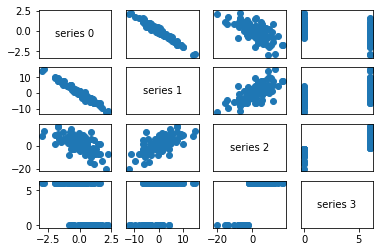

In [14]:
# corr_data is a list of four 100-d vectors

# num columns
num_vectors = len(corr_data)

fig, ax = plt.subplots(num_vectors, num_vectors)

print(num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            ax[i][j].scatter(corr_data[j], corr_data[i])    
        else:
            ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                             xycoords='axes fraction',
                             ha="center",
                             va="center")
        if i < num_vectors -1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)
            
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

#### w00t!

### Using Named Tuples

In [15]:
import datetime

stock_price = {'closing_price': 102.86,
              'date': datetime.date(2014, 8, 29),
              'symbol':  'AAPL'}

In [16]:
# named tuple alternative

from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

In [17]:
# typed named tuple best

from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
        
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
    
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

### Dataclasses

In [18]:
from dataclasses import dataclass

# StockPrice2 does not inherit base class
# needs Python 3.7 to work

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float
        
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

ModuleNotFoundError: No module named 'dataclasses'

### Cleaning and Munging

In [19]:
# ...

### Manipulating Data

In [20]:
# ...

### Rescaling

In [21]:
# ...

### tqdm

In [22]:
# ...

### Dimensionality Reduction

In [23]:
# from working_with_data.py

pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

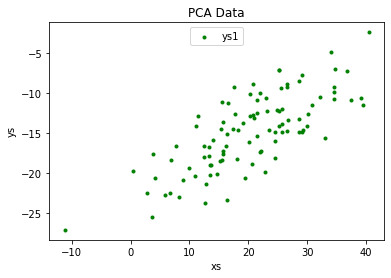

In [24]:
import matplotlib.pyplot as plt

xs, ys = zip(*pca_data)

# scatter
plt.scatter(xs, ys, marker=".", color='green', label='ys1')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("PCA Data")
plt.show()

In [25]:
from typing import List

from scratch.linear_algebra import Vector, subtract

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return[subtract(vector, mean) for vector in data]

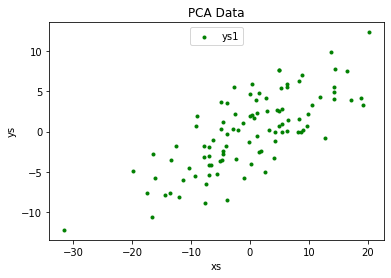

In [26]:
from scratch.linear_algebra import Vector, subtract, vector_mean

demeaned_pca_data = de_mean(pca_data)

xs, ys = zip(*demeaned_pca_data)

# scatter
plt.scatter(xs, ys, marker=".", color='green', label='ys1')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("PCA Data")
plt.show()

In [27]:
from scratch.linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [28]:
from scratch.linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)
    

In [29]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
           for i in range(len(w))]

In [30]:
#import tqdm

from scratch.gradient_descent import gradient_step

def first_principal_component(data: List[Vector], 
                             n: int = 100,
                             step_size: float = 0.1 ) -> Vector:
    guess = [1.0 for _ in data[0]]
    
#    with tqdm.trange(n) as t:
    for _ in range(n):
        dv = directional_variance(data, guess)
        gradient = directional_variance_gradient(data, guess)
        guess = gradient_step(guess, gradient, step_size)
        #t.set_description(f"dv: {dv:.3f}")
    return direction(guess)

In [31]:
pc1 = first_principal_component(demeaned_pca_data)

print(pc1)

[0.9237307801943212, 0.3830423549969252]


In [32]:
from scratch.linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """Return the projection of v onto the direction of w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)


pc1_projected = project(, pc1)



TypeError: can't multiply sequence by non-int of type 'list'